# IT3385 Task 1: Exploratory Data Analysis (EDA)
## Dataset: Wheat Seeds Classification

**Objective:** Explore class separability and feature relationships with rich, clear visualisations.


In [1]:
import numpy as np, pandas as pd, matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (8,5)
csv_path = '../data/wheatseeds/03_Wheat_Seeds.csv'
print('Using dataset path:', csv_path)
df = pd.read_csv(csv_path)
print('Shape:', df.shape)
df.head()

Using dataset path: ../data/wheatseeds/03_Wheat_Seeds.csv
Shape: (199, 8)


,Area,Perimeter,Compactness,Length,Width,AsymmetryCoeff,Groove,Type
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,1
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1


### 1) Data health: schema & missingness

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 199 entries, 0 to 198
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Area            199 non-null    float64
 1   Perimeter       199 non-null    float64
 2   Compactness     199 non-null    float64
 3   Length          199 non-null    float64
 4   Width           199 non-null    float64
 5   AsymmetryCoeff  199 non-null    float64
 6   Groove          199 non-null    float64
 7   Type            199 non-null    int64  
dtypes: float64(7), int64(1)
memory usage: 12.6 KB


In [3]:
df.isnull().sum()

Area              0
Perimeter         0
Compactness       0
Length            0
Width             0
AsymmetryCoeff    0
Groove            0
Type              0
dtype: int64

### 2) Target balance — class counts

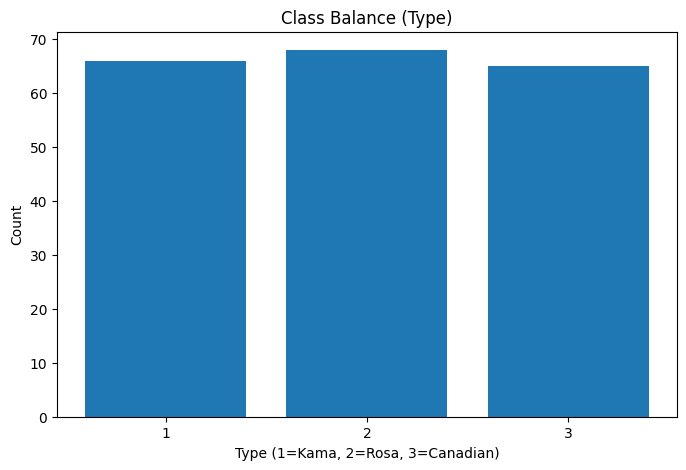

In [4]:
if 'Type' in df.columns:
    counts = df['Type'].value_counts().sort_index()
    plt.figure(); plt.bar(counts.index.astype(str), counts.values); plt.title('Class Balance (Type)'); plt.xlabel('Type (1=Kama, 2=Rosa, 3=Canadian)'); plt.ylabel('Count'); plt.show(); counts

## Data Health

- **199 rows × 8 columns**, no missing values.
- **Balanced dataset** across 3 wheat varieties (Kama, Rosa, Canadian).
- - Prep: **No imputation needed**, but small dataset -> risk of overfitting.

### 3) Univariate distributions

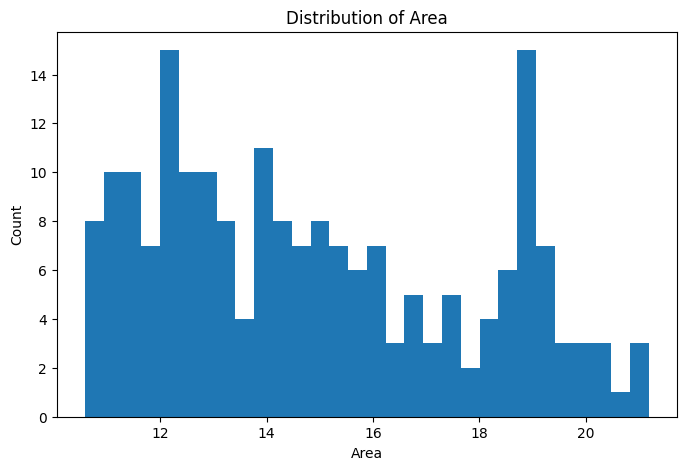

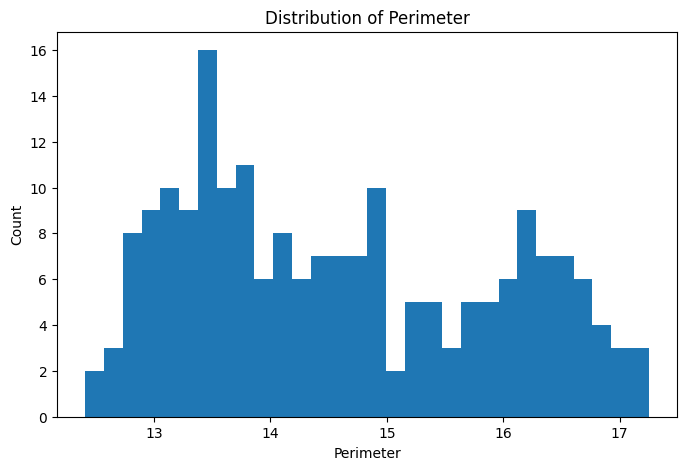

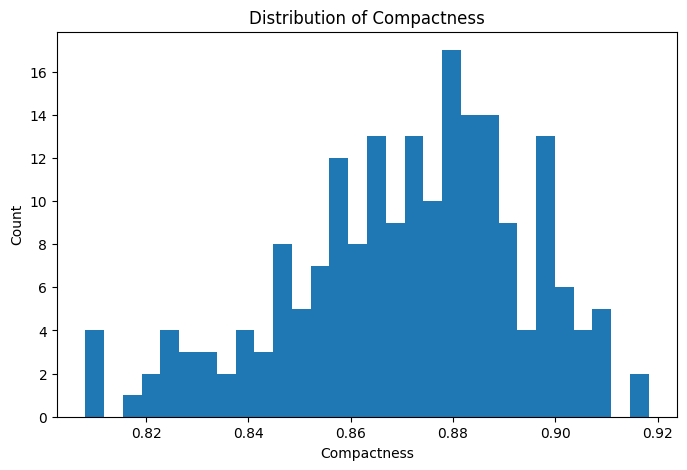

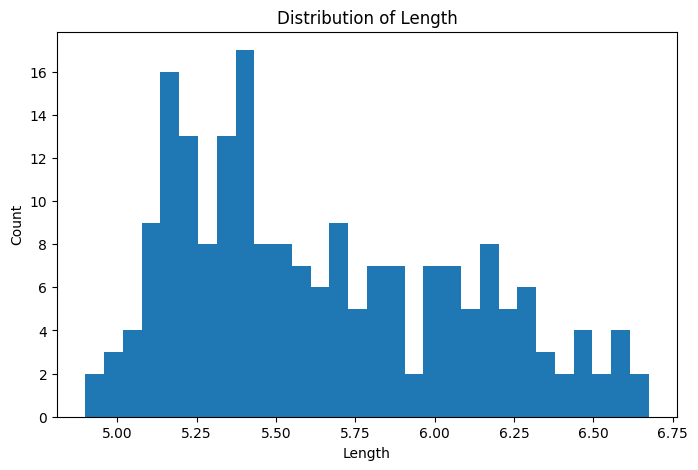

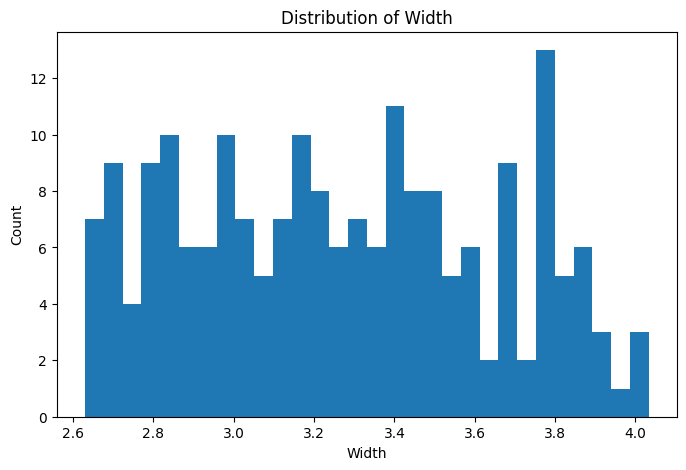

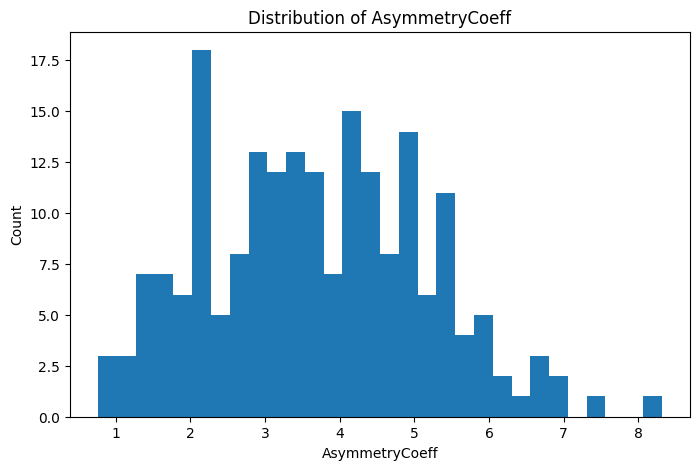

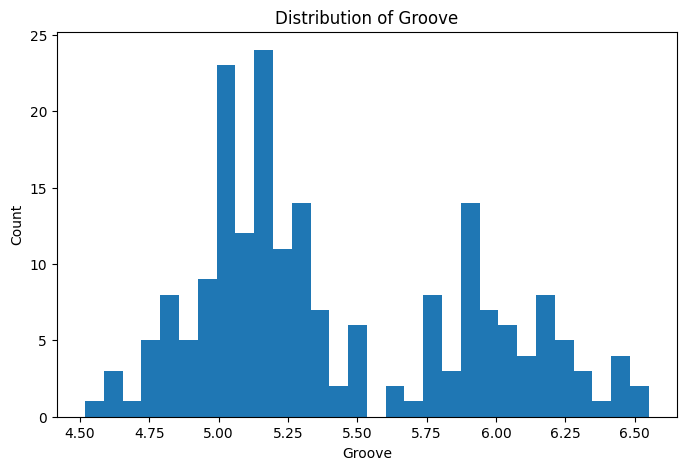

In [5]:
features = [c for c in df.columns if c != 'Type']
for c in features:
    plt.figure(); plt.hist(df[c].dropna(), bins=30); plt.title(f'Distribution of {c}'); plt.xlabel(c); plt.ylabel('Count'); plt.show()

### Univariate Features

- Features (Area, Perimeter, Length, Width, Groove, etc.) are **continuous**.

- Most show roughly **normal-like distributions with slight skew**.

- - Prep: Scaling needed (e.g., **StandardScaler**).

### 4) Class-wise boxplots (feature vs Type)

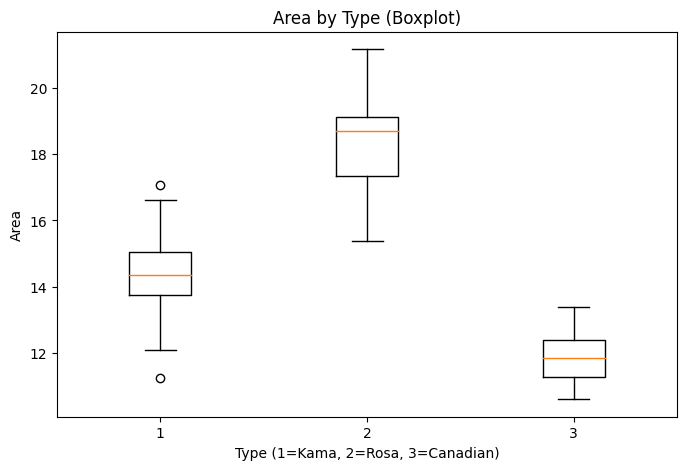

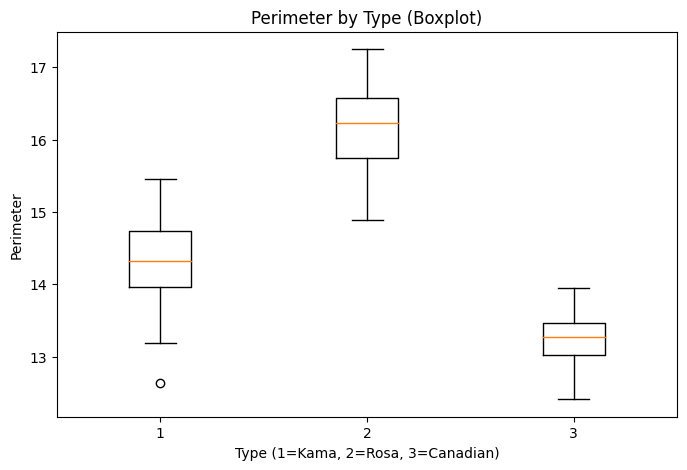

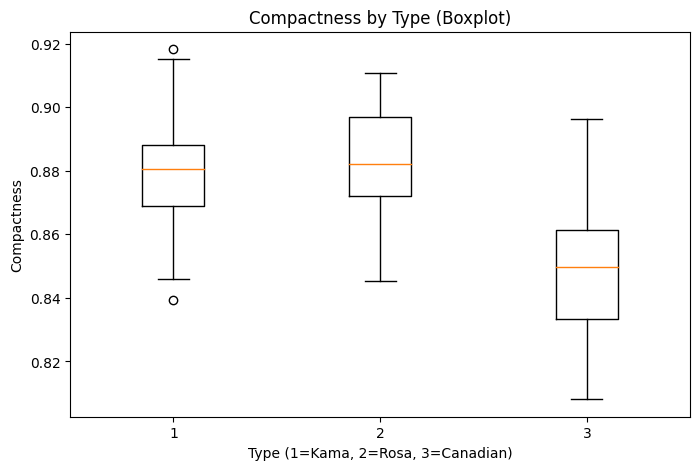

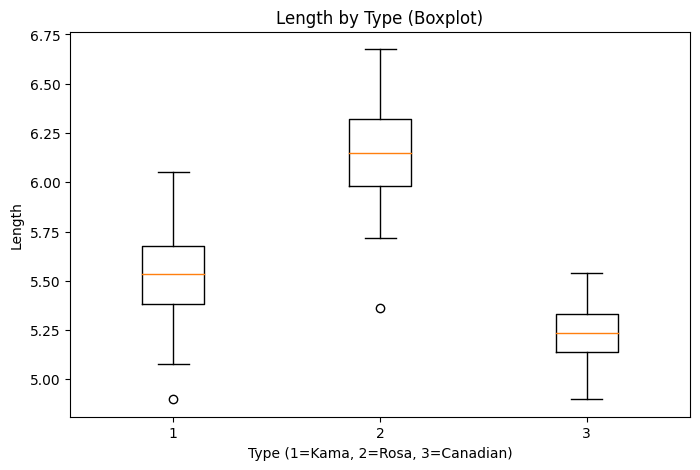

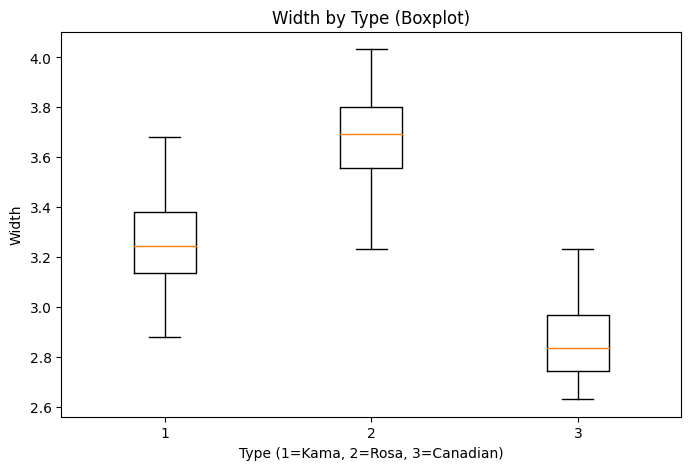

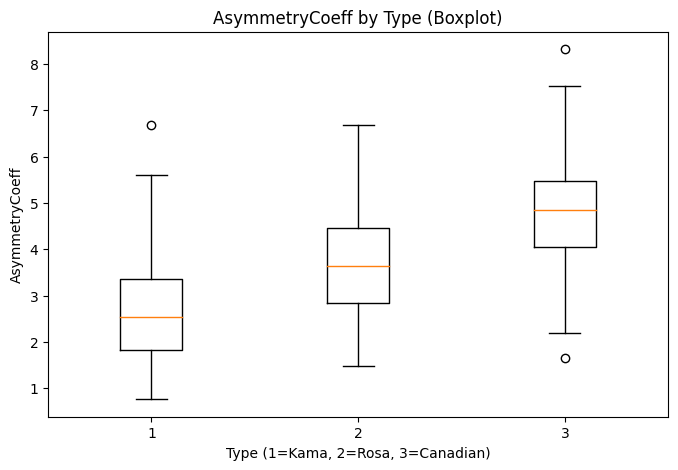

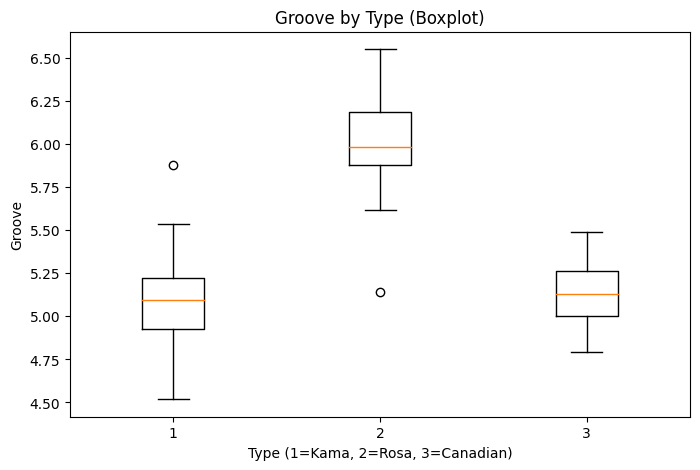

In [6]:
for c in features:
    if 'Type' in df.columns:
        grouped = [df[df['Type']==k][c].dropna() for k in sorted(df['Type'].unique())]
        plt.figure(); plt.boxplot(grouped, labels=[str(k) for k in sorted(df['Type'].unique())]); plt.title(f'{c} by Type (Boxplot)'); plt.xlabel('Type (1=Kama, 2=Rosa, 3=Canadian)'); plt.ylabel(c); plt.show()

### Boxplots by Class

- Clear separability:

- - **Length & Width** distinguish classes well.

- - **Compactness** and **Groove** also show variation across classes.
- - - Prep: **Strong discriminatory** features for classification.

### 5) Feature relationships - indicative scatter plots

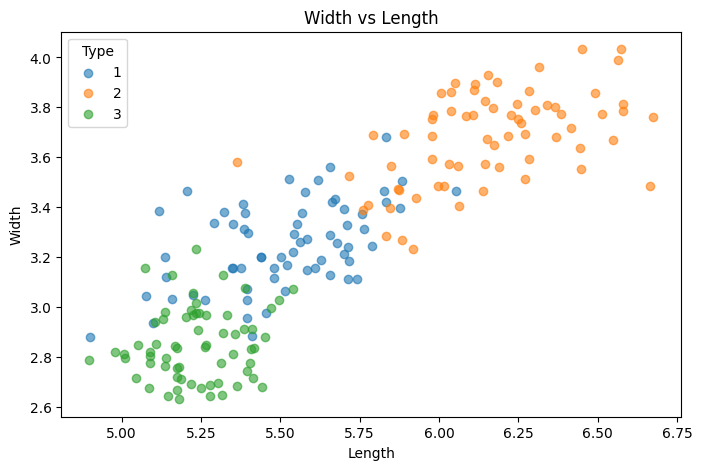

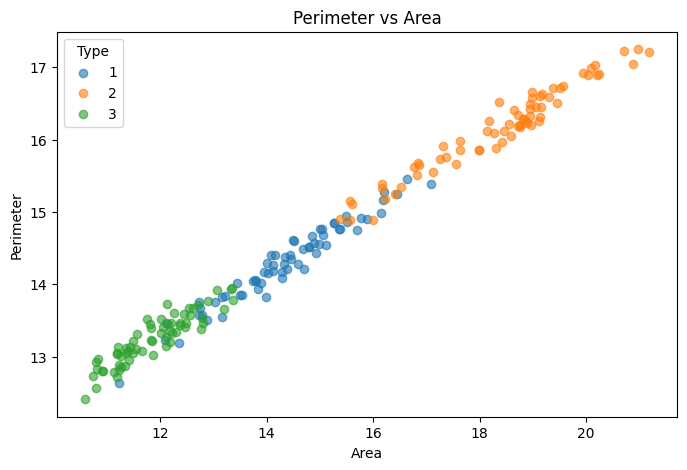

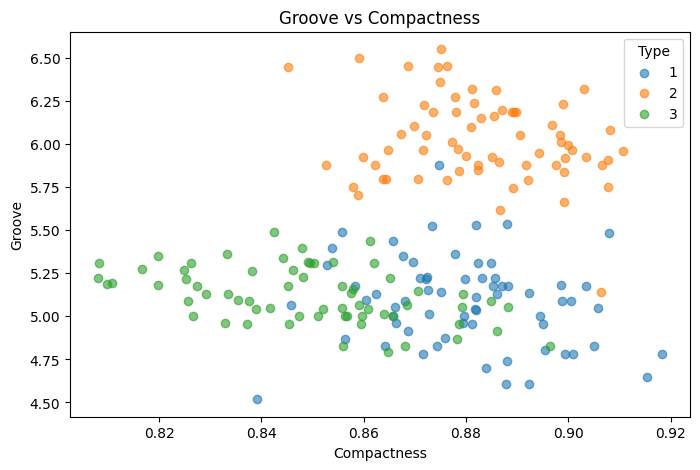

In [7]:
def scatter_two(x, y):
    if x not in df.columns or y not in df.columns:
        return
    plt.figure()
    if 'Type' in df.columns:
        for k in sorted(df['Type'].unique()):
            sub = df[df['Type']==k]
            plt.scatter(sub[x], sub[y], alpha=0.6, label=str(k))
        plt.legend(title='Type')
    else:
        plt.scatter(df[x], df[y], alpha=0.6)
    plt.title(f'{y} vs {x}')
    plt.xlabel(x)
    plt.ylabel(y)
    plt.show()

scatter_two('Length','Width')
scatter_two('Area','Perimeter')
scatter_two('Compactness','Groove')

### Relationships

- Scatterplots (e.g., Area vs Perimeter, Length vs Width) show **distinct class clusters**.
- - Prep: **Non-linear boundaries** might work best (tree-based models, SVM).

### 6) Correlation analysis

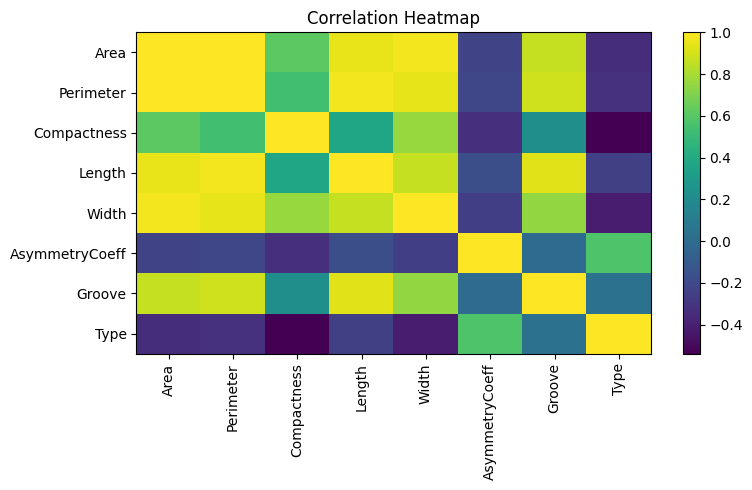

,Area,Perimeter,Compactness,Length,Width,AsymmetryCoeff,Groove,Type
Area,1.000000,0.994437,0.609887,0.951126,0.970980,-0.222820,0.862727,-0.340664
Perimeter,0.994437,1.000000,0.531841,0.972944,0.945496,-0.211034,0.889543,-0.322223
Compactness,0.609887,0.531841,1.000000,0.374011,0.762167,-0.329400,0.227016,-0.539261
Length,0.951126,0.972944,0.374011,1.000000,0.862680,-0.169704,0.932124,-0.249422
Width,0.970980,0.945496,0.762167,0.862680,1.000000,-0.253122,0.748228,-0.421961
AsymmetryCoeff,-0.222820,-0.211034,-0.329400,-0.169704,-0.253122,1.000000,-0.003349,0.573956
Groove,0.862727,0.889543,0.227016,0.932124,0.748228,-0.003349,1.000000,0.035508
Type,-0.340664,-0.322223,-0.539261,-0.249422,-0.421961,0.573956,0.035508,1.000000


In [8]:
num_df = df.select_dtypes(include=[np.number])
corr = num_df.corr(numeric_only=True)
plt.figure(); plt.imshow(corr, aspect='auto'); plt.xticks(range(len(corr.columns)), corr.columns, rotation=90); plt.yticks(range(len(corr.index)), corr.index); plt.title('Correlation Heatmap'); plt.colorbar(); plt.tight_layout(); plt.show(); corr

### Correlation Analysis

- Strong correlations between **Area, Perimeter, Length, Width**(expected, as they describe size).

- Some **redundancy** -> dimensionality reduction could help.
- - Prep: **Feature selection** or **PCA** to avoid **multicollinearity**.

### 7) PCA (2D) - structure & separability

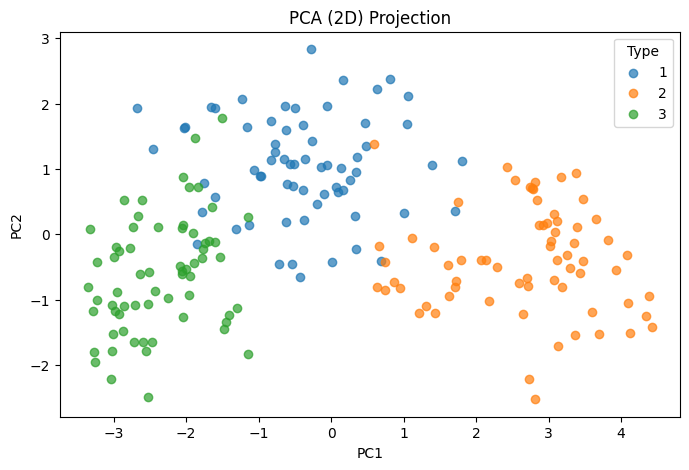

Explained variance ratio (PC1, PC2): [0.71878659 0.17130487]


In [9]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
X = df.drop(columns=['Type']) if 'Type' in df.columns else df.copy()
X = X.select_dtypes(include=[np.number]).dropna()
scaler = StandardScaler(); X_scaled = scaler.fit_transform(X)
pca = PCA(n_components=2, random_state=42); X_pca = pca.fit_transform(X_scaled)
plt.figure()
if 'Type' in df.columns and len(df)==len(X_pca):
    for k in sorted(df['Type'].unique()):
        mask = (df['Type']==k).values
        plt.scatter(X_pca[mask,0], X_pca[mask,1], alpha=0.7, label=str(k))
    plt.legend(title='Type')
else:
    plt.scatter(X_pca[:,0], X_pca[:,1], alpha=0.7)
plt.title('PCA (2D) Projection'); plt.xlabel('PC1'); plt.ylabel('PC2'); plt.show()
print('Explained variance ratio (PC1, PC2):', pca.explained_variance_ratio_)

### PCA Projection

- PCA 2D shows **well-separated clusters** for the three classes.
- - Prep: Confirms features are **highly informative**; classification should perform very well.

### 8) Key insights & takeaways
- Check class balance and use appropriate metrics in modeling.
- Length/Width/Area/Perimeter often show strong class separation.
- Correlations suggest redundancy; consider dimensionality reduction.
- PCA indicates cluster structure; useful qualitative validation.